In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


Missing colon in file WindowsPath('d:/ProgramData/Anaconda3/envs/learn-ml/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 256 ('<!-- #font.family:  sans-serif -->')
Missing colon in file 'd:\\ProgramData\\Anaconda3\\envs\\learn-ml\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc', line 256 ('<!-- #font.family:  sans-serif -->')


In [3]:
# 类别1 500 类别2 50
class_1 = 500
class_2 = 50 
centers = [[0.0, 0.0], [2.0, 2.0]] #设定两个类别的中心
clusters_std = [1.5, 0.5] #设定两个类别的方差，通常来说，样本量比较大的类别会更加松散
X, y = make_blobs(n_samples=[class_1, class_2],
                    centers=centers,
                    cluster_std=clusters_std,
                    random_state=0, shuffle=False) #看看数据集长什么样


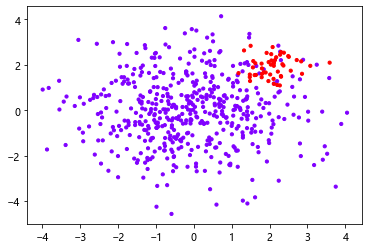

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="rainbow",s=10) #其中红色点是少数类，紫色点是多数类

In [8]:
# 建模
clf = svm.SVC(kernel='linear',C=1.0)
clf.fit(X,y)

SVC(kernel='linear')

In [9]:
# 设定class_weight
wclf = svm.SVC(kernel='linear',class_weight={1:10})
wclf.fit(X,y)

SVC(class_weight={1: 10}, kernel='linear')

In [10]:
clf.score(X,y)

0.9418181818181818

In [11]:
wclf.score(X,y)

0.9127272727272727

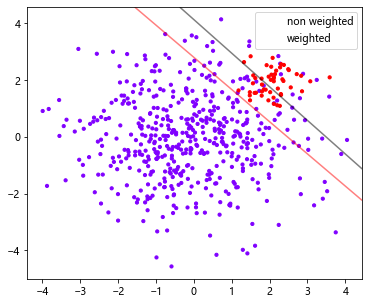

In [15]:
# 绘制决策边界
#首先要有数据分布
plt.figure(figsize=(6,5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="rainbow",s=10)
ax = plt.gca() #获取当前的子图，如果不存在，则创建新的子图
#绘制决策边界的第一步：要有网格
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T #第二步：找出我们的样本点到决策边界的距离
Z_clf = clf.decision_function(xy).reshape(XX.shape) 
a = ax.contour(XX, YY, Z_clf, colors='black', levels=[0], alpha=0.5, linestyles=['-'])
Z_wclf = wclf.decision_function(xy).reshape(XX.shape) 
b = ax.contour(XX, YY, Z_wclf, colors='red', levels=[0], alpha=0.5, linestyles=['-'])
#第三步：画图例
plt.legend([a.collections[0], b.collections[0]], ["non weighted", "weighted"],loc="upper right")
plt.show()

In [16]:
a.collections #调用这个等高线对象中画的所有线，返回一个惰性对象
#用[*]把它打开试试看
[*a.collections] #返回了一个linecollection对象，其实就是我们等高线里所有的线的列表
#现在我们只有一条线，所以我们可以使用索引0来锁定这个对象 a.collections[0]
#plt.legend([对象列表],[图例列表],loc) #只要对象列表和图例列表相对应，就可以显示出图例
#给两个模型分别打分看看，这个分数是accuracy准确度 #做样本均衡之后，我们的准确率下降了，没有样本均衡的准确率更高 
clf.score(X,y)  
wclf.score(X,y)

0.9127272727272727

In [20]:
#所有判断正确并确实为1的样本 / 所有被判断为1的样本
#对于没有class_weight，没有做样本平衡的灰色决策边界来说：
(y[y == clf.predict(X)] == 1).sum()/(clf.predict(X) == 1).sum()

0.7142857142857143

In [21]:
#对于有class_weight，做了样本平衡的红色决策边界来说：
(y[y == wclf.predict(X)] == 1).sum()/(wclf.predict(X) == 1).sum()

0.5102040816326531

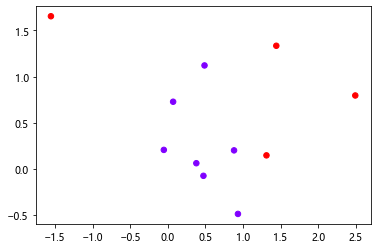

In [25]:
class_1_ = 7
class_2_ = 4
centers_ = [[0.0, 0.0], [1,1]] 
clusters_std = [0.5, 1] 
X_, y_ = make_blobs(n_samples=[class_1_, class_2_], centers=centers_, cluster_std=clusters_std, random_state=0, shuffle=False) 
plt.scatter(X_[:, 0], X_[:, 1], c=y_, cmap="rainbow",s=30)

In [26]:
from sklearn.linear_model import LogisticRegression as LogiR
clf_lo = LogiR().fit(X_,y_)
prob = clf_lo.predict_proba(X_) #将样本和概率放到一个DataFrame中
import pandas as pd
prob = pd.DataFrame(prob)
prob.columns = ["0","1"]
prob

,0,1
0,0.694619,0.305381
1,0.510931,0.489069
2,0.820038,0.179962
3,0.785647,0.214353
4,0.777387,0.222613
5,0.656634,0.343366
6,0.768586,0.231414
7,0.349171,0.650829
8,0.366184,0.633816
9,0.663272,0.336728


In [27]:
#手动调节阈值，来改变我们的模型效果
for i in range(prob.shape[0]):
    if prob.loc[i,"1"] > 0.5:
        prob.loc[i,"pred"] = 1
    else:
        prob.loc[i,"pred"] = 0
prob["y_true"] = y_
prob = prob.sort_values(by="1",ascending=False)
prob

,0,1,pred,y_true
7,0.349171,0.650829,1.0,1
8,0.366184,0.633816,1.0,1
1,0.510931,0.489069,0.0,0
10,0.607529,0.392471,0.0,1
5,0.656634,0.343366,0.0,0
9,0.663272,0.336728,0.0,1
0,0.694619,0.305381,0.0,0
6,0.768586,0.231414,0.0,0
4,0.777387,0.222613,0.0,0
3,0.785647,0.214353,0.0,0


In [32]:
from sklearn.metrics import confusion_matrix as CM, precision_score as P, recall_score as R
CM(prob.loc[:,"y_true"],prob.loc[:,"pred"],labels=[1,0])

array([[2, 2],
       [0, 7]], dtype=int64)

In [33]:
#试试看手动计算Precision和Recall?
P(prob.loc[:,"y_true"],prob.loc[:,"pred"],labels=[1,0])

1.0

In [34]:
R(prob.loc[:,"y_true"],prob.loc[:,"pred"],labels=[1,0])

0.5

In [35]:
for i in range(prob.shape[0]):
    if prob.loc[i,"1"] > 0.4:
        prob.loc[i,"pred"] = 1
    else:
        prob.loc[i,"pred"] = 0

In [37]:
prob
CM(prob.loc[:,"y_true"],prob.loc[:,"pred"],labels=[1,0])

array([[2, 2],
       [1, 6]], dtype=int64)

In [38]:
P(prob.loc[:,"y_true"],prob.loc[:,"pred"],labels=[1,0])

0.6666666666666666

In [39]:
R(prob.loc[:,"y_true"],prob.loc[:,"pred"],labels=[1,0])

0.5

array([[0.69187022, 0.30812978],
       [0.29365735, 0.70634265],
       [0.95681773, 0.04318227],
       ...,
       [0.18360762, 0.81639238],
       [0.38315893, 0.61684107],
       [0.34548146, 0.65451854]])

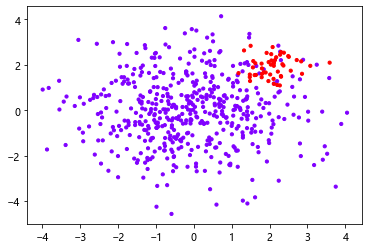

In [45]:
#使用最初的X和y，样本不均衡的这个模型
class_1 = 500 #类别1有500个样本
class_2 = 50 #类别2只有50个
centers = [[0.0, 0.0], [2.0, 2.0]] #设定两个类别的中心
clusters_std = [1.5, 0.5] #设定两个类别的方差，通常来说，样本量比较大的类别会更加松散
X, y = make_blobs(n_samples=[class_1, class_2],
                    centers=centers,
                    cluster_std=clusters_std,
                    random_state=0, shuffle=False) #看看数据集长什么样
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="rainbow",s=10) #其中红色点是少数类，紫色点是多数类
clf_proba = svm.SVC(kernel="linear",C=1.0,probability=True).fit(X,y)
clf_proba.predict_proba(X)

In [44]:
clf_proba.predict_proba(X).shape

(550, 2)

In [47]:
clf_proba.decision_function(X)

array([ -0.39182241,   0.95617053,  -2.24996184,  -2.63659269,
        -3.65243197,  -1.67311996,  -2.56396417,  -2.80650393,
        -1.76184723,  -4.7948575 ,  -7.59061196,  -3.66174848,
        -2.2508023 ,  -4.27626526,   0.78571364,  -3.24751892,
        -8.57016271,  -4.45823747,  -0.14034183,  -5.20657114,
        -8.02181046,  -4.18420871,  -5.6222409 ,  -5.12602771,
        -7.22592707,  -5.07749638,  -6.72386021,  -3.4945225 ,
        -3.51475144,  -5.72941551,  -5.79160724,  -8.06232013,
        -4.36303857,  -6.25419679,  -5.59426696,  -2.60919281,
        -3.90887478,  -4.38754704,  -6.46432224,  -4.54279979,
        -4.78961735,  -5.53727469,   1.33920817,  -2.27766451,
        -4.39650854,  -2.97649872,  -2.26771979,  -2.40781748,
        -1.41638181,  -3.26142275,  -2.7712218 ,  -4.87288439,
        -3.2594128 ,  -5.91189118,   1.48676267,   0.5389064 ,
        -2.76188843,  -3.36126945,  -2.64697843,  -1.63635284,
        -5.04695135,  -1.59196902,  -5.5195418 ,  -2.10

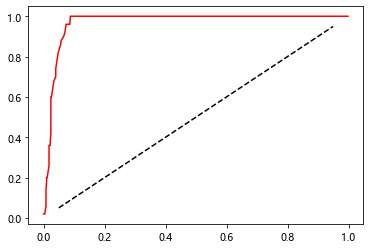

In [49]:
#首先来看看如何从混淆矩阵中获取FPR和Recall
cm = CM(prob.loc[:,"y_true"],prob.loc[:,"pred"],labels=[1,0])
cm
#FPR
cm[1,0]/cm[1,:].sum()
#Recall
cm[0,0]/cm[0,:].sum()
#开始绘图
recall = []
FPR = []
probrange = np.linspace(clf_proba.predict_proba(X)[:,1].min(),clf_proba.predict_proba(X)[:,1].max(),num=50,endpoint=False)
from sklearn.metrics import confusion_matrix as CM, recall_score as R
import matplotlib.pyplot as plot
for i in probrange:
    y_predict = []
    for j in range(X.shape[0]):
        if clf_proba.predict_proba(X)[j,1] > i:
            y_predict.append(1)
        else:
            y_predict.append(0)
    cm = CM(y,y_predict,labels=[1,0])
    recall.append(cm[0,0]/cm[0,:].sum())
    FPR.append(cm[1,0]/cm[1,:].sum())
recall.sort()
FPR.sort()
plt.plot(FPR,recall,c="red")
plt.plot(probrange+0.05,probrange+0.05,c="black",linestyle="--")
plt.show()